# Homework 1 - Building Familiarity with Orbits
Lorraine Nicholson

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Problem 1, part b

Code up an iterative procedure that allows you to calculate a new r =r1 and θ =θ1 starting
from the periastron point r0 = a(1 – e) at an initial time t0=0 and initial angle θ0 =0. This
procedure should allow you to calculate r and θ at each time-step covering a full orbital period
of a planet.

In [134]:
#Constants
G = 6.67e-8                    #cgs
M_star = 1.989e33              #grams

#Choose some values for a, e, and time
a = 0.7*1.496e+13              #number of AU [cm]
e = 0.29
time_stop = 0.6*3.154e+7       #number of year [s]
#dt = time_stop/100
dt = 86400                     #1 days [s]

#Initial conditions
r_initial = a*(1-e)
t_initial = 0
theta_initial = 0

#Create lists for later
r,theta,time = [r_initial], [theta_initial], [t_initial]

#Total angular momentum
curlyL = np.sqrt(G*M_star*a*(1-e**2))

# Iterative process
while t_initial < time_stop:
    
    #Update quantities
    dTheta = (curlyL/r_initial**2) * dt
    theta_initial += dTheta
    r_initial = (a * (1-e**2)) / (1 + e*np.cos(theta_initial))
    t_initial += dt
    
    #Save quantities
    theta.append(theta_initial)
    r.append(r_initial)
    time.append(t_initial)

#r,theta,time


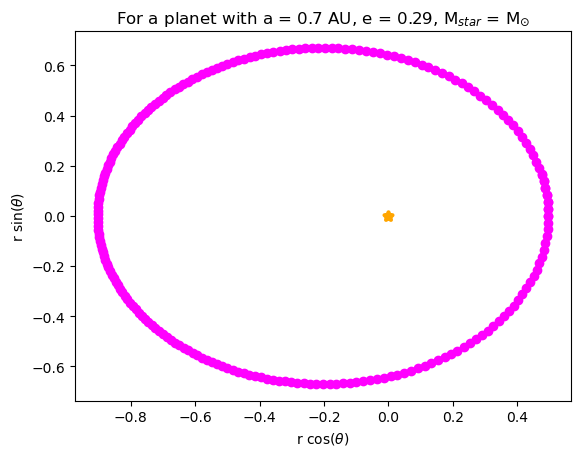

In [135]:
# Plotting
plt.scatter(np.array(r)/1.496e+13*np.cos(theta), np.array(r)/1.496e+13*np.sin(theta), color='magenta')
plt.scatter(0,0,marker="*", color='orange', linewidth=3)
plt.xlabel('r cos($\u03b8$)')
plt.ylabel('r sin($\u03b8$)')
plt.title('For a planet with a = '+str(a/1.496e+13)+' AU, e = '+str(e)+', M$_{star}$ = M$_{\odot}$');

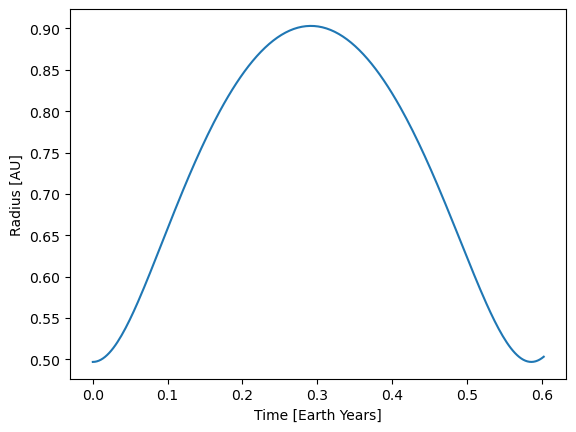

In [136]:
plt.plot(np.array(time)/3.154e+7, np.array(r)/1.496e+13)
plt.xlabel('Time [Earth Years]')
plt.ylabel('Radius [AU]');

## Problem 2, part d
The assumption of a planet’s temperature actually responding instantaneously to varying in-
solation isn’t quite right. There’s a delay in the temperature response due to solar forcing;
the amount of that delay depends on the heat capacity of the surface material. For a liquid
water ocean, for example, this delay is two to three months. Using the code you wrote for
1(d), calculate the instantaneous temperature of the planet at every ∆t increment. Plot this
temperature versus time, over a full year, then overplot horizontal lines corresponding to the
nominal “habitable zone” between the freezing and boiling points of water. Assuming that the
planet has a liquid water ocean (that is, you can have a running time-average over 2-3
months), how does this curve change? Look at the table below from Dressing et al. 2010
(“Habitable Climates: The Influence of Eccentricity”). If you had a land planet (assuming
that the temperature response time scales linearly with surface heat capacity), how does your
temperature curve change? If you wanted to ensure that your planet never departed from
the “habitable zone”, what is its lowest possible surface heat capacity? What is a material
with a similar heat capacity?

In [137]:
period = np.sqrt((a/1.496e+13)**3)
print('Period = '+str(period)+' years')

Period = 0.5856620185738528 years


### Calculate instantaneous temperature

In [138]:
#Some constants
albedo = 0.3             #dimensionless
L_sun = 3.846e33         #cgs
sigma_sb = 5.6704e-5     #cgs
to_AU = 1.496e+13
boilingTemp_water = 373  #K
freezingTemp_water = 273 #K

#Calculate instantaneous temperature
temp_inst = ((1-albedo)*L_sun/(16*np.pi*sigma_sb*np.array(r)**2))**(1/4) #K


In [139]:
temp_inst.min(), temp_inst.max()

(268.2242901957216, 361.54465969839174)

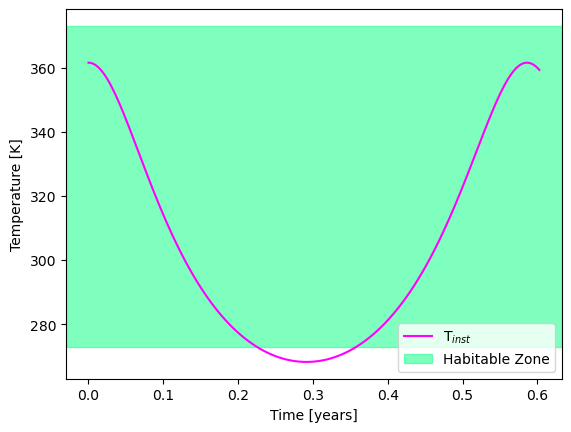

In [140]:
plt.plot(np.array(time)/3.154e+7, temp_inst, color='magenta', label='T$_{inst}$')
plt.axhspan(freezingTemp_water, boilingTemp_water, color='springgreen', alpha=0.5, label='Habitable Zone')
plt.legend(loc='lower right')

plt.xlabel('Time [years]')
plt.ylabel('Temperature [K]');



#### I thought it would be fun to plot the orbit of the planet color coded with instantaneous temperature,

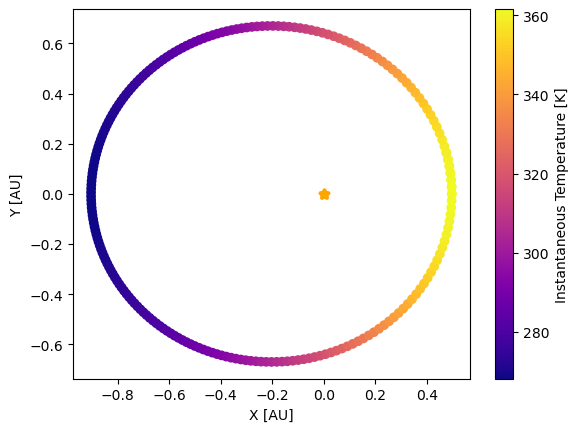

In [141]:
plt.scatter(np.array(r)/1.496e+13*np.cos(theta), np.array(r)/1.496e+13*np.sin(theta), c=temp_inst, cmap='plasma')
plt.colorbar(label='Instantaneous Temperature [K]')
plt.scatter(0,0,marker='*', color='orange', linewidth=3)

plt.xlabel('X [AU]')
plt.ylabel('Y [AU]');


### If the planet has a liquid water ocean,

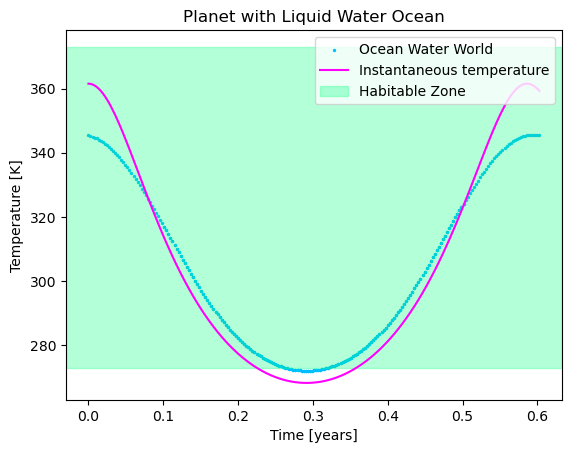

In [143]:
#Do a moving window average method
window = 75*24*3600                      #2.5 months [s]
window_size = int(np.floor(window/dt))   #time-averaged
#print(window_size)

#Make a pandas dataframe of time and instantaneous temperatures
df = pd.DataFrame()
df['time'] = time
df['temperature'] = temp_inst
df = pd.concat([df,df])

time_averaged_temperature = df.rolling(window_size, center=True).mean().temperature

plt.scatter(df.time/3.154e+7, time_averaged_temperature, s=2, color='deepskyblue', label='Ocean Water World')
plt.plot(np.array(time)/3.154e+7, temp_inst, color='magenta', label='Instantaneous temperature')

#Plot habitable zone
plt.axhspan(freezingTemp_water, boilingTemp_water, color='springgreen', alpha=0.3, label='Habitable Zone')

plt.legend(loc='upper right')
plt.xlabel('Time [years]')
plt.ylabel('Temperature [K]')
plt.title('Planet with Liquid Water Ocean');




#### Zoom-in at periastron

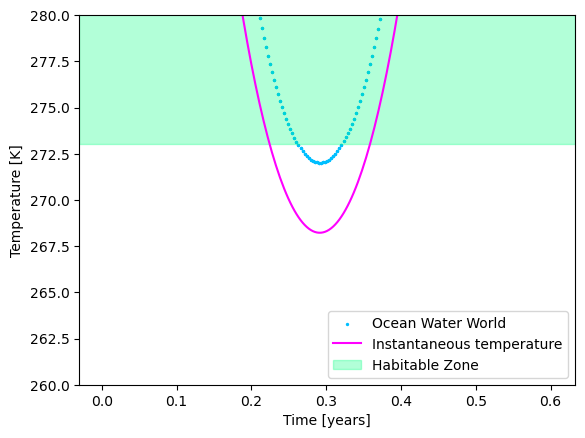

In [145]:
#Do a moving window average method
window = 75*24*3600                      #2.5 months [s]
window_size = int(np.floor(window/dt))   #time-averaged
#print(window_size)

#Make a pandas dataframe of time and instantaneous temperatures
df = pd.DataFrame()
df['time'] = time
df['temperature'] = temp_inst
df = pd.concat([df,df])

time_averaged_temperature = df.rolling(window_size, center=True).mean().temperature

plt.scatter(df.time/3.154e+7, time_averaged_temperature, s=2, color='deepskyblue', label='Ocean Water World')
plt.plot(np.array(time)/3.154e+7, temp_inst, color='magenta', label='Instantaneous temperature')

#Plot habitable zone
plt.axhspan(freezingTemp_water, boilingTemp_water, color='springgreen', alpha=0.3, label='Habitable Zone')

plt.legend(loc='lower right')
plt.xlabel('Time [years]')
plt.ylabel('Temperature [K]')
plt.ylim(260,280);

### For a land planet,

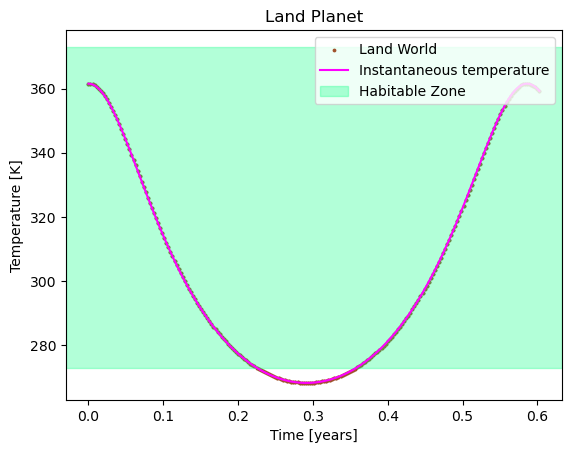

In [151]:
#Do a moving window average method
#dt = 18
window = 75*24*3600 / 40                    #Divide by 40 based on the Dressing et. al. 2010 table
window_size = int(np.floor(window/dt))   #time-averaged
#print(window_size)

#Make a pandas dataframe of time and instantaneous temperatures
df = pd.DataFrame()
df['time'] = time
df['temperature'] = temp_inst
df = pd.concat([df,df])

time_averaged_temperature = df.rolling(window_size, center=True).mean().temperature

plt.scatter(df.time/3.154e+7, time_averaged_temperature, s=3, color='sienna', label='Land World')
plt.plot(np.array(time)/3.154e+7, temp_inst, color='magenta', label='Instantaneous temperature')

#Plot habitable zone
plt.axhspan(freezingTemp_water, boilingTemp_water, color='springgreen', alpha=0.3, label='Habitable Zone')

plt.legend(loc='upper right')
plt.xlabel('Time [years]')
plt.ylabel('Temperature [K]')
plt.title('Land Planet');


### What is the minimum surface heat capacity needed to remain in the Habitable Zone?

In [153]:
np.mean(temp_inst)

304.8493024428385

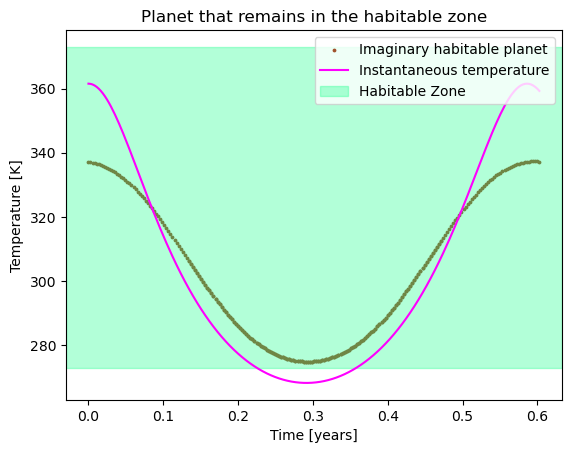

In [169]:
#Do a moving window average method
#dt = 18
window = time_stop * 0.45                #Determine the minimum window based on time
window_size = int(np.floor(window/dt))   #time-averaged
#print(window_size)

#Make a pandas dataframe of time and instantaneous temperatures
df = pd.DataFrame()
df['time'] = time
df['temperature'] = temp_inst
df = pd.concat([df,df])

time_averaged_temperature = df.rolling(window_size, center=True).mean().temperature

plt.scatter(df.time/3.154e+7, time_averaged_temperature, s=3, color='sienna', label='Imaginary habitable planet')
plt.plot(np.array(time)/3.154e+7, temp_inst, color='magenta', label='Instantaneous temperature')

#Plot habitable zone
plt.axhspan(freezingTemp_water, boilingTemp_water, color='springgreen', alpha=0.3, label='Habitable Zone')

plt.legend(loc='upper right')
plt.xlabel('Time [years]')
plt.ylabel('Temperature [K]')
plt.title('Planet that remains in the habitable zone');


In [171]:
window_hz = time_stop * 0.45
window_ocean = 75*24*3600
window_land = 75*24*3600 / 40

window_hz/window_ocean, window_hz/window_land


(1.3141666666666667, 52.56666666666667)

For this planet to remain safely in the Habitable Zone for it's entire orbit, it must have a surface heat capacity that is 52.57 time larger than the heat capacity of a land planet.

In [174]:
heatCapacity_land = 5.25e9                     #erg cm^-2 K-1
heatCapacity_hz = heatCapacity_land * 52.57

print('Heat Capacity = '+str(heatCapacity_hz)+' erg cm^-2 K^-1')

Heat Capacity = 275992500000.0 erg cm^-2 K^-1


## Problem 3

## Problem 3, part b
The full equation for the isolation mass (at which planetesimal growth begins to level off) will
be derived in lecture before this assignment is due, or you can look it up in de Pater &
Lissauer. Using your profile for Σp (r) from part (a), plot the isolation mass for a growing
planet (in units of Earth masses) as a function of distance from the Sun (in units of AU,
from 0 to 10 AU).

### Isolation mass,

In [175]:
#Define some constants
m_star = 1.989e+33                            #g
constants = 8/np.sqrt(3)*np.pi**(3/2)*m_star**(-1/2)

#For the Solar System, radius of snow line ~3 AU
r_in = np.arange(0.1, 3, step=0.1)         #radii inside of snowline, [AU]
r_out = np.arange(3, 10.1, step=0.1)       #radii outside of snowline, [AU] 
r_in_cgs = r_in * 1.496e+13                #[cm]
r_out_cgs = r_out * 1.496e+13              #[cm]

#Coefficients of surface density equations
sigma_in = 1700                            #Inside of snowline
sigma_out = 6800                           #Outside of snowline

#Calculate isolation masses
mIsolation_in = r_in_cgs**3 * sigma_in**(3/2) * constants
mIsolation_out = r_out_cgs**3 * sigma_out**(3/2) * constants


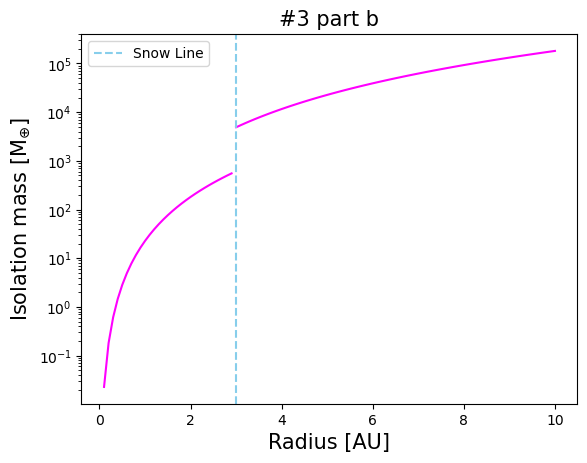

In [176]:
#Plotting
plt.plot(r_in, mIsolation_in/5.972e+27, color='magenta')
plt.plot(r_out, mIsolation_out/5.972e+27, color='magenta')

plt.axvline(3, linestyle='dashed', color='skyblue', label='Snow Line')
plt.yscale('log')
plt.ylabel('Isolation mass [M$_{\oplus}$]', fontsize=15)
plt.xlabel('Radius [AU]', fontsize=15)
plt.legend()
plt.title('#3 part b', fontsize=15);

## Problem 3, part c

Add the curve for M$_{env}$ on the plot from part (b), using a material density appropriate for rocky
bodies for radii within the snowline and a material density appropriate for icy bodies for radii
beyond the snowline. You’ll need an expression for T disk ! Use this: T 4 = 6 *109 (r/AU)-3 K4 .

### Minimum mass needed to accrete a significant atmosphere,

In [177]:
#Nominal material densities
density_rocky = 5.5     #g/cm^3
density_ice = 1         #g/cm^3

#Calculate temperature throughout disk
T_disk_in = (6e9 * r_in**-3)**(1/4)   #Inside of snow line, [K]
T_disk_out = (6e9 * r_out**-3)**(1/4) #Outside of snow line, [K]

#Equations for surface density
sigma_in = 1700 * (r_in)**-1.5
sigma_out = 6800 * (r_out)**-1.5

#Calculate envelope masses
M_env_in = 1.6e-6 * (density_rocky)**(-1/2) * T_disk_in**(3/2) * np.log(2*density_rocky*r_in_cgs/sigma_in) 
M_env_out = 1.6e-6 * (density_ice)**(-1/2) * T_disk_out**(3/2) * np.log(2*density_ice*r_out_cgs/sigma_out) 

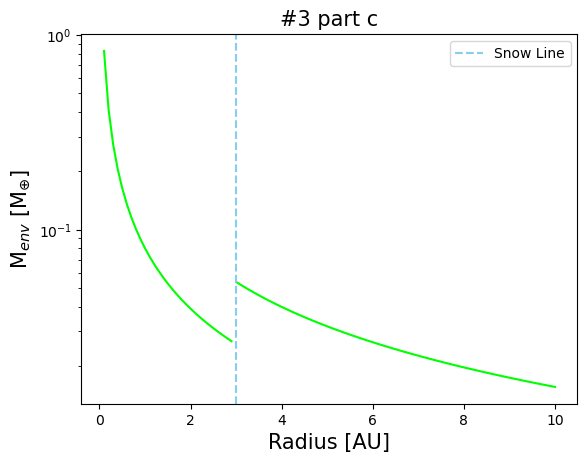

In [178]:
#Plotting
plt.plot(r_in, M_env_in, color='lime')
plt.plot(r_out, M_env_out, color='lime')

plt.axvline(3.0, color='skyblue', label='Snow Line', linestyle='dashed')
plt.xlabel('Radius [AU]', fontsize = 15)
plt.ylabel('M$_{env}$ [M$_{\oplus}$]', fontsize = 15)
plt.title('#3 part c', fontsize = 15)
plt.yscale('log')
plt.legend();


### Combining the results from part b and part c,

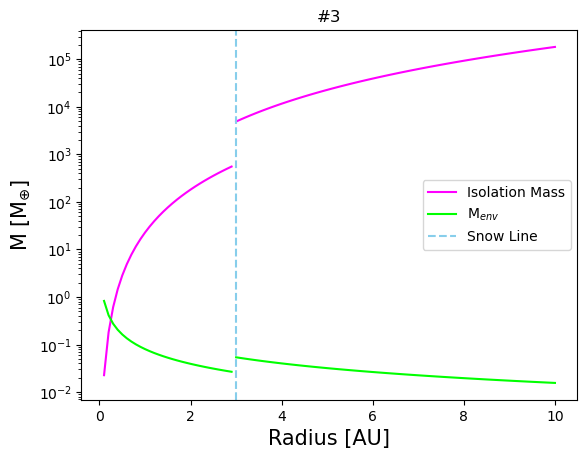

In [179]:
#Part b:
plt.plot(r_in, mIsolation_in/5.972e+27, color='magenta', label='Isolation Mass')
plt.plot(r_out, mIsolation_out/5.972e+27, color='magenta')
#Part c:
plt.plot(r_in, M_env_in, color='lime', label='M$_{env}$')
plt.plot(r_out, M_env_out, color='lime')

plt.axvline(3.0, color='skyblue', label='Snow Line', linestyle='dashed')
plt.xlabel('Radius [AU]', fontsize = 15)
plt.ylabel('M [M$_{\oplus}$]', fontsize = 15)
plt.yscale('log')
plt.title('#3')
plt.legend();